# Stock Market Prediction

* Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange.

## Working With Dataset
* we have the iris dataset.Before creating the model and training it,
* we have to preprocess the dataset. Preprocessing means converting the dataset into an understandable format before using it for any machine learning algorithms.

## Importing Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [166]:
!pip install xgboost 

In [169]:
from xgboost import XGBClassifier


# Read the dataset

In [130]:
df = pd.read_csv(r"C:\Users\Akash Borse\Downloads\TCS.NSE.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0
...,...,...,...,...,...,...,...
1661,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3871.300049,2320754.0
1662,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3836.949951,1673362.0
1663,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3779.149902,2253075.0
1664,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,3791.899902,2489161.0


## Head will give us the first five rows and columns in the dataframe

In [131]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0


## Tail will give us the last five rows and columns in the dataframe

In [132]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1661,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3871.300049,2320754.0
1662,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3836.949951,1673362.0
1663,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3779.149902,2253075.0
1664,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,3791.899902,2489161.0
1665,2021-09-30,3805.000000,3805.000000,3750.100098,3775.550049,3775.550049,2252412.0


## It shows the total no of rows and columns

In [133]:
df.shape

(1666, 7)

In [134]:
print("Total Rows =",df.shape[0])
print("Total Columns =",df.shape[1])

Total Rows = 1666
Total Columns = 7


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1666 non-null   object 
 1   Open       1663 non-null   float64
 2   High       1663 non-null   float64
 3   Low        1663 non-null   float64
 4   Close      1663 non-null   float64
 5   Adj Close  1663 non-null   float64
 6   Volume     1663 non-null   float64
dtypes: float64(6), object(1)
memory usage: 91.2+ KB


In [136]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03
mean,1826.027599,1845.240901,1805.624554,1825.226400,1733.238404,2.871305e+06
std,679.259927,686.315197,672.102864,678.990594,714.701808,2.752632e+06
min,1058.449951,1070.000000,1025.949951,1050.574951,955.857666,8.682200e+04
25%,1255.912476,1265.000000,1243.000000,1254.787536,1129.899963,1.738917e+06
50%,1725.000000,1750.000000,1702.000000,1725.625000,1619.241089,2.404448e+06
75%,2168.974976,2189.700074,2146.075074,2165.025024,2079.880738,3.328333e+06
max,3930.000000,3981.750000,3892.100098,3954.550049,3954.550049,8.806715e+07


##  Exploratory Data Analysis

* Exploratory Data Analysis is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

* While performing the EDA of the TCS NSE Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

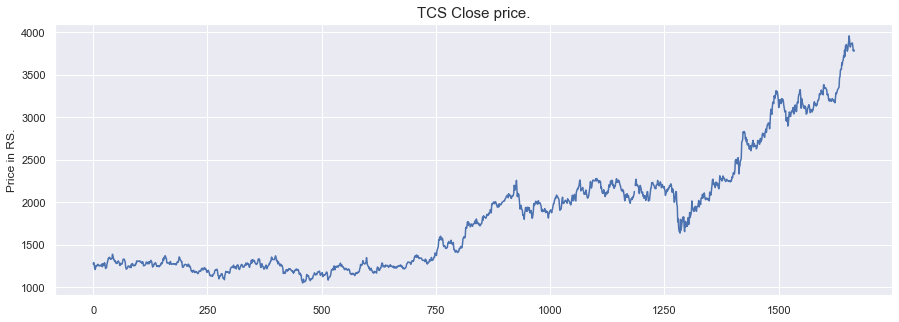

In [137]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('TCS Close price.', fontsize=15)
plt.ylabel('Price in RS.')
plt.show()

* The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

# Checking the null values

In [138]:
df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [139]:
df1=df.where((pd.notnull(df)),'')

In [140]:
df1.isnull().sum(axis=0)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Distribution Plot

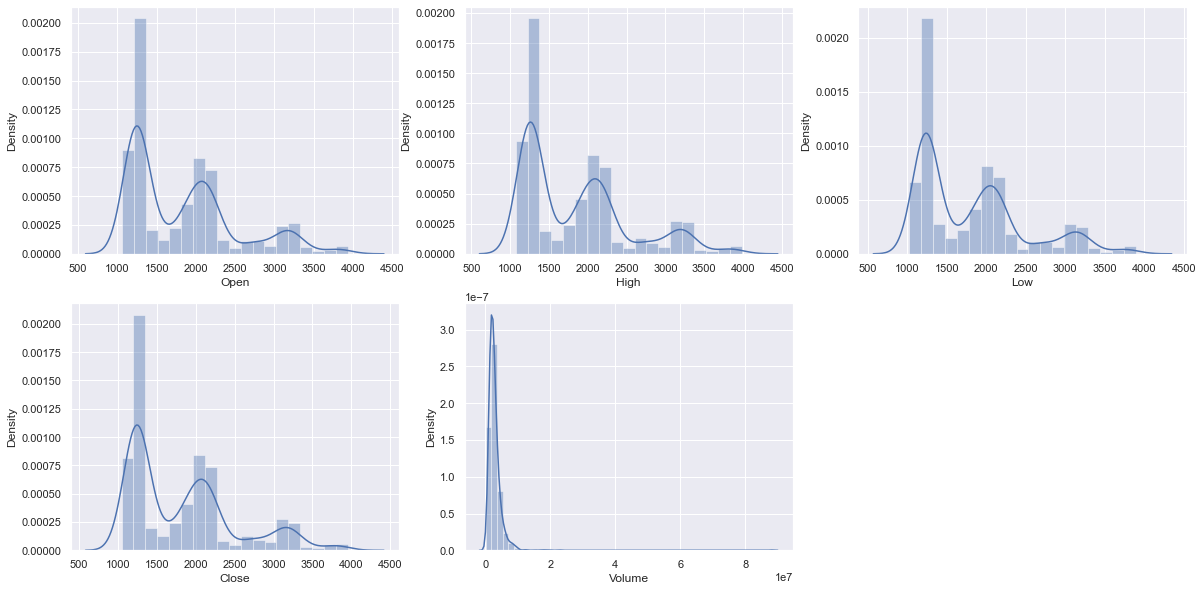

In [141]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

* This is the OHLC chart which is a type of bar chart that shows open, high, low, and closing prices for each period.
* It can be applied to any timeframe.

# Histogram

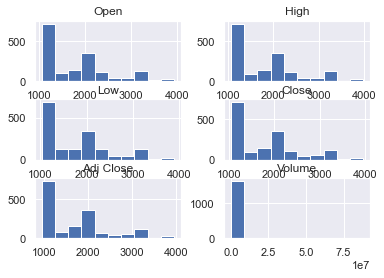

In [142]:
sns.set(style="darkgrid")
df.hist()
plt.show()

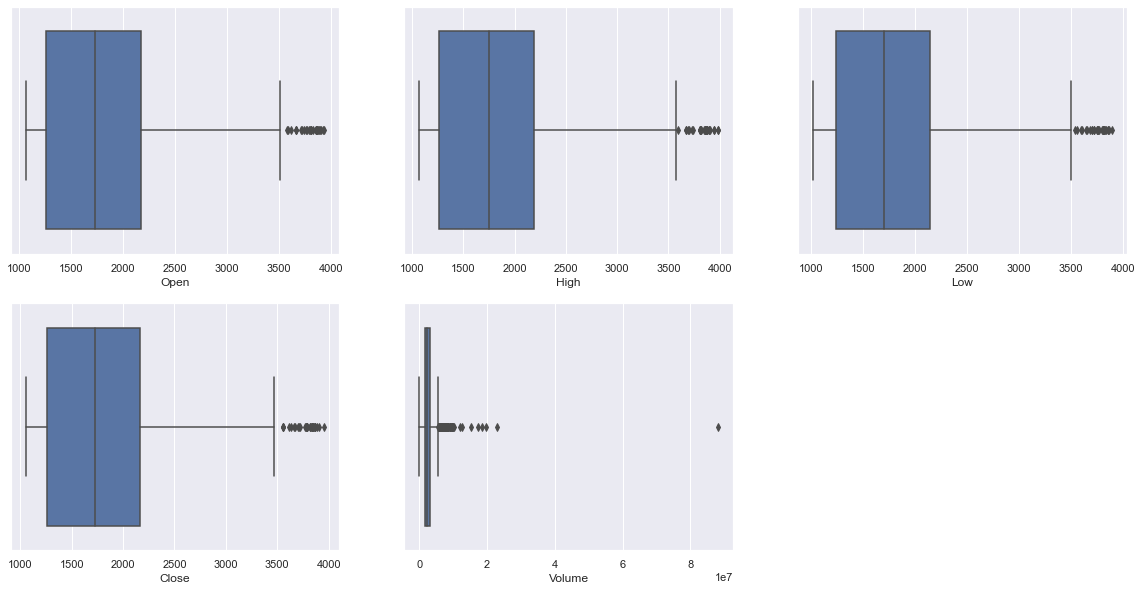

In [143]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

# Feature Engineering

* Feature Engineering helps to derive some valuable features from the existing ones. 
* These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [144]:
splitted = df['Date'].str.split('-',expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0,1,1,2015
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0,2,1,2015
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0,5,1,2015
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0,6,1,2015
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0,7,1,2015
...,...,...,...,...,...,...,...,...,...,...
1661,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3871.300049,2320754.0,24,9,2021
1662,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3836.949951,1673362.0,27,9,2021
1663,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3779.149902,2253075.0,28,9,2021
1664,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,3791.899902,2489161.0,29,9,2021


In [145]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0,1,1,2015,0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0,2,1,2015,0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0,5,1,2015,0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0,6,1,2015,0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0,7,1,2015,0


* A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance.

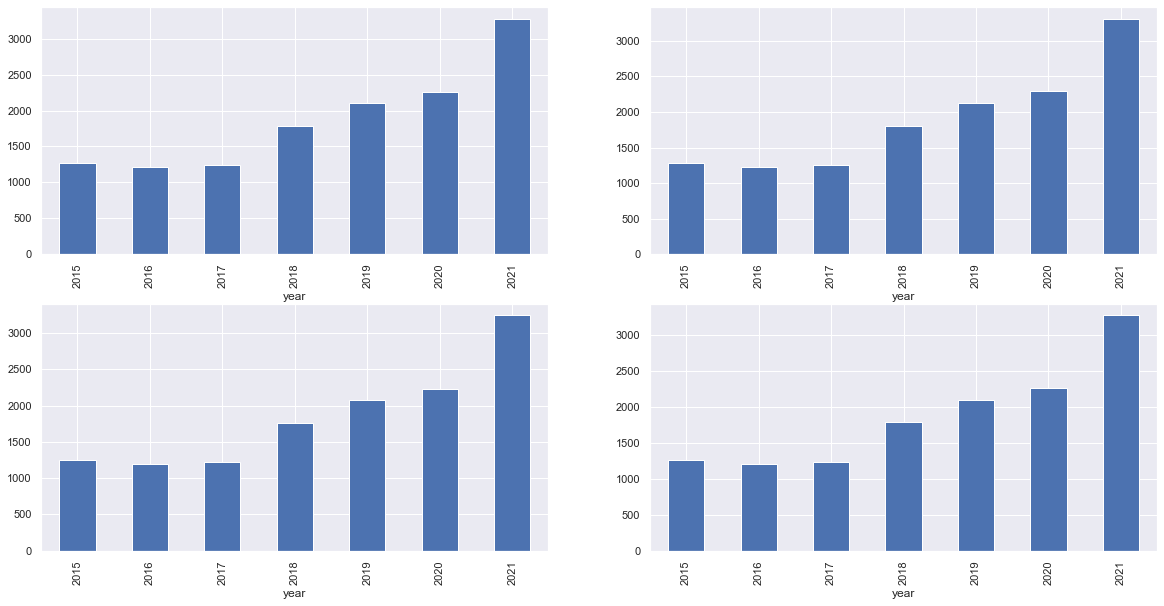

In [146]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [147]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,1812.120809,1830.768407,1791.602021,1810.831570,1717.448618,2.858218e+06,15.821138,5.840108,2017.894309
1,1853.492887,1873.823430,1833.318429,1853.655546,1764.422525,2.897150e+06,15.667263,7.357782,2017.885510


* In above grouped data
* Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
* The volume of trades is lower in the months which are quarter end.

In [148]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

* We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. 
* Before proceeding let’s check whether the target is balanced or not using a pie chart.

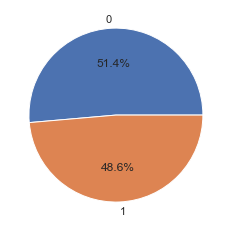

In [149]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

## Correlation Matrix
* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.
* When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

In [150]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
Open,1.000000,0.999572,0.999594,0.999185,0.998509,0.104266,0.006775,0.037817,0.883913,0.028781,0.030003,-0.548138,0.013179
High,0.999572,1.000000,0.999492,0.999671,0.999118,0.111553,0.007706,0.035909,0.886225,0.029643,0.007379,-0.562102,0.013223
Low,0.999594,0.999492,1.000000,0.999625,0.998876,0.100129,0.007031,0.039026,0.882649,0.029329,0.009033,-0.535466,0.013318
Close,0.999185,0.999671,0.999625,1.000000,0.999297,0.106064,0.007667,0.037638,0.884250,0.029802,-0.010363,-0.549924,0.012941
Adj Close,0.998509,0.999118,0.998876,0.999297,1.000000,0.108607,0.008180,0.040921,0.894244,0.031057,-0.009708,-0.554717,0.014979
Volume,0.104266,0.111553,0.100129,0.106064,0.108607,1.000000,0.035590,-0.053617,0.163152,0.006683,-0.043500,-0.357805,0.020812
day,0.006775,0.007706,0.007031,0.007667,0.008180,0.035590,1.000000,0.014859,-0.002299,-0.008265,-0.022018,-0.021757,-0.011981
month,0.037817,0.035909,0.039026,0.037638,0.040921,-0.053617,0.014859,1.000000,-0.074313,0.210988,0.004795,0.061194,-0.008498
year,0.883913,0.886225,0.882649,0.884250,0.894244,0.163152,-0.002299,-0.074313,1.000000,-0.002129,0.000344,-0.579301,0.034454
is_quarter_end,0.028781,0.029643,0.029329,0.029802,0.031057,0.006683,-0.008265,0.210988,-0.002129,1.000000,-0.025024,-0.024430,0.007078


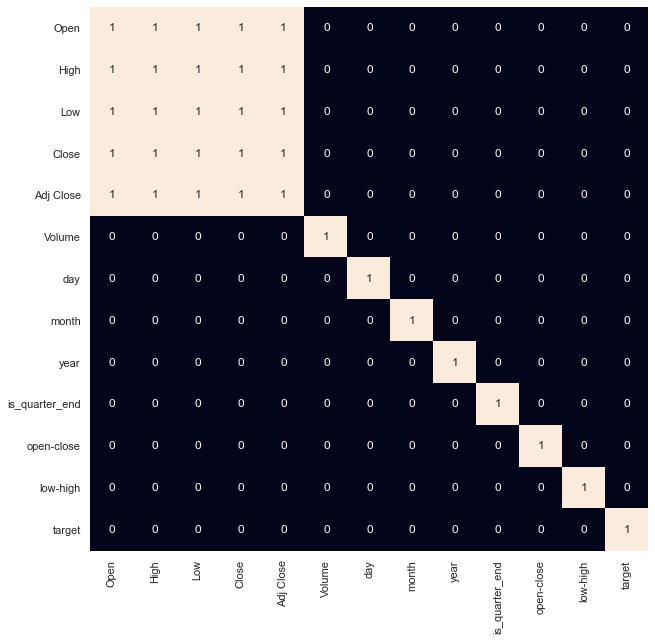

In [151]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

* From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

## Split The Data Into Training & Testing Datasets
* The training dataset is used to train the model and the testing dataset is to test the model which has been trained with the training dataset.


In [174]:
newdf = df.dropna(axis = 0, how ='any')

In [182]:
newdf['open-close'] = newdf['open-close'].astype(int)
newdf['low-high'] = newdf['low-high'].astype(int)
  

In [184]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1665
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1663 non-null   object 
 1   Open            1663 non-null   float64
 2   High            1663 non-null   float64
 3   Low             1663 non-null   float64
 4   Close           1663 non-null   float64
 5   Adj Close       1663 non-null   float64
 6   Volume          1663 non-null   float64
 7   day             1663 non-null   int32  
 8   month           1663 non-null   int32  
 9   year            1663 non-null   int32  
 10  is_quarter_end  1663 non-null   int32  
 11  open-close      1663 non-null   int32  
 12  low-high        1663 non-null   int32  
 13  target          1663 non-null   int32  
dtypes: float64(6), int32(7), object(1)
memory usage: 149.4+ KB


In [185]:
features = newdf[['open-close', 'low-high', 'is_quarter_end']]
target = newdf['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_test.shape)

(1496, 3) (167, 3)


In [186]:
Y_train[:5]

179     0
1105    0
5       1
1260    1
1022    0
Name: target, dtype: int32

## Model Training
* Now classifying the TCS NSC dataset using logistic regression. For creating the model, import LogisticRegression from the sci-kit learn library.
## What is Logistic Regression ?
* Logistic Regression is used to find the relationship between dependent and independent variables. This is done by using a logistic regression equation. This is a very easy to implement, understand, and also easy method to train the model.

In [189]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Testing Accuracy : ', metrics.roc_auc_score(
    Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5239491507539216
Testing Accuracy :  0.3747479112647652

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5380949059542908
Testing Accuracy :  0.40435033131662346

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy : 